In [11]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
#split of dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
# Normalize the images(scale down to 0-1)[0,255]->[0,1]:model learn fast
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:

# Define the model
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

#flatten:convert img into flat array , to pass through dense layers
#activation function=ReLU:learn non-linear pattern
#activation function=softmax: convert o/p to probabilities that sum to 1

In [15]:
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

#how to update weights:optimizer
#how to measure error:loss
#what metrics to track:metrics

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7798 - loss: 0.6342
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8650 - loss: 0.3812
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8764 - loss: 0.3432
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8842 - loss: 0.3160
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8896 - loss: 0.3000
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8951 - loss: 0.2846
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2721
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9059 - loss: 0.2534
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9070 - loss: 0.2500
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9109 - loss: 0.2397
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8789 - loss: 0.3358
Test accuracy: 0.8801000118255615
313/313 

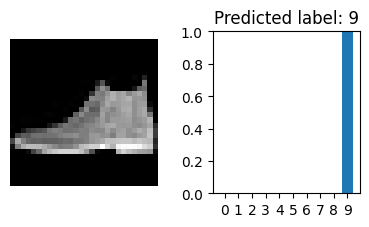

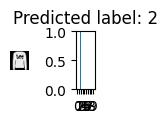

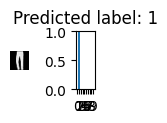

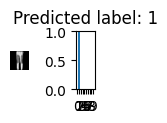

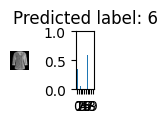

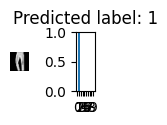

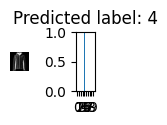

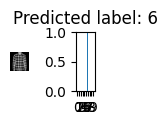

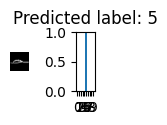

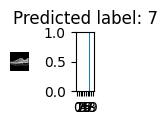

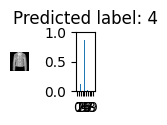

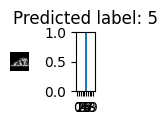

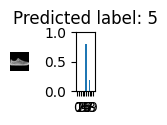

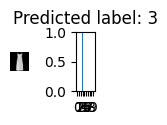

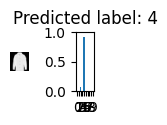

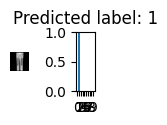

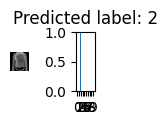

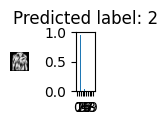

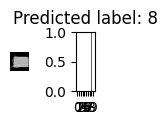

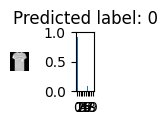

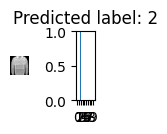

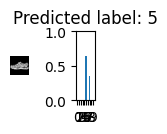

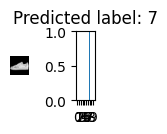

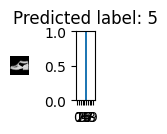

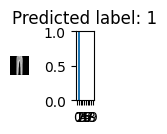

In [16]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
#test_loss:final loss on test data
#test_acc:accuracy on test dataset



# Make predictions
predictions = model.predict(test_images) 
predicted_labels =np.argmax(predictions, axis=1)
#predict:returns a list of 10 probabilities
#argmax(find label with highest probability)

#cisually verif how confident model is in its prediction
# Show some example images and their predicted labels
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols 
plt.figure(figsize=(2 * 2 *num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1) 
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2) 
    plt.bar(range(10),predictions[i]) 
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.title(f"Predicted label: {predicted_labels[i]}")
    plt.show()